## Global Markov Property and Faithfulness Tests

#### Packages Required :
 1. bnlearn (used for learning the graphical structure of Bayesian networks, estimating their parameters and performing some useful inference)
 2. arules (used for mining association rules and frequent itemsets)
 3. BiocManager(used to install and manage packages from the Bioconductor project for statistical analysis)
 4. Rgraphviz(used for plotting R graph objects

In [24]:
#installing the required packages
install.packages('bnlearn',repos='http://cran.us.r-project.org')
install.packages('arules',repos='http://cran.us.r-project.org')
install.packages('tidyverse',repos='http://cran.us.r-project.org')
install.packages("BiocManager")
BiocManager::install("Rgraphviz")

Warning message:
"package 'bnlearn' is in use and will not be installed"Warning message:
"package 'arules' is in use and will not be installed"Warning message:
"package 'tidyverse' is in use and will not be installed"

package 'BiocManager' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\erago\AppData\Local\Temp\RtmpuwiIyN\downloaded_packages


Bioconductor version 3.10 (BiocManager 1.30.10), R 3.6.1 (2019-07-05)
Installing package(s) 'Rgraphviz'
Warning message:
"package 'Rgraphviz' is in use and will not be installed"Old packages: 'askpass', 'backports', 'BH', 'boot', 'broom', 'caret', 'class',
  'clipr', 'cluster', 'codetools', 'colorspace', 'curl', 'data.table', 'DBI',
  'digest', 'evaluate', 'fansi', 'forcats', 'foreach', 'formatR', 'fs',
  'generics', 'glmnet', 'gower', 'hexbin', 'htmltools', 'htmlwidgets',
  'httpuv', 'ipred', 'IRkernel', 'iterators', 'jsonlite', 'KernSmooth',
  'knitr', 'labeling', 'later', 'lattice', 'lava', 'lubridate', 'magrittr',
  'markdown', 'MASS', 'Matrix', 'mgcv', 'mime', 'ModelMetrics', 'nlme', 'nnet',
  'numDeriv', 'openssl', 'pbdZMQ', 'pkgconfig', 'plyr', 'prettyunits',
  'prodlim', 'progress', 'promises', 'quantmod', 'R6', 'Rcpp', 'readr',
  'recipes', 'repr', 'reshape2', 'rmarkdown', 'rstudioapi', 'scales',
  'selectr', 'shiny', 'spatial', 'SQUAREM', 'stringi', 'survival', 'sys',
  'test

In [ ]:
library('bnlearn')
library('Rgraphviz')
library('dplyr')
library('arules')
library('tidyverse')

In [26]:
#reading the discretized data
discrete_df <-read.csv('C:/Users/erago/Airbnb/data/listings_full2.csv')
discrete_df$mobility <- (discrete_df$bikeScore + discrete_df$walkScore + discrete_df$transitScore)/3
discrete_df

X   id       Zestimate listing_url                          
1    0    18711  1235453   https://www.airbnb.com/rooms/18711   
2    1    27611   675443   https://www.airbnb.com/rooms/27611   
3    2    29765  1449552   https://www.airbnb.com/rooms/29765   
4    3    45987  1407265   https://www.airbnb.com/rooms/45987   
5    4    95453  1391903   https://www.airbnb.com/rooms/95453   
6    5   197972  1423450   https://www.airbnb.com/rooms/197972  
7    6   257588  1230166   https://www.airbnb.com/rooms/257588  
8    7   533114   856774   https://www.airbnb.com/rooms/533114  
9    8   601763   775683   https://www.airbnb.com/rooms/601763  
10   9   708802  1314520   https://www.airbnb.com/rooms/708802  
11  10   863788   791624   https://www.airbnb.com/rooms/863788  
12  11  1881298   532529   https://www.airbnb.com/rooms/1881298 
13  12  2183058   525000   https://www.airbnb.com/rooms/2183058 
14  13  2723274  2961308   https://www.airbnb.com/rooms/2723274 
15  14  3985462   590722   https://www.airbnb.com/rooms/3985462 
16  15  4560053   652984   https://www.airbnb.com/rooms/4560053 
17  16  4909590  1496802   https://www.airbnb.com/rooms/4909590 
18  17  5717690   754050   https://www.airbnb.com/rooms/5717690 
19  18  5718921  1489056   https://www.airbnb.com/rooms/5718921 
20  19  6066455   884540   https://www.airbnb.com/rooms/6066455 
21  20  6119918   639669   https://www.airbnb.com/rooms/6119918 
22  21  6300089   380511   https://www.airbnb.com/rooms/6300089 
23  22  6465075   464687   https://www.airbnb.com/rooms/6465075 
24  23  6793945  2146978   https://www.airbnb.com/rooms/6793945 
25  24  7298966   437136   https://www.airbnb.com/rooms/7298966 
26  25  7527149  9919097   https://www.airbnb.com/rooms/7527149 
27  26  7531700  1525000   https://www.airbnb.com/rooms/7531700 
28  27  7540480  1561164   https://www.airbnb.com/rooms/7540480 
29  28  7614517   413425   https://www.airbnb.com/rooms/7614517 
30  29  7635616  1525000   https://www.airbnb.com/rooms/7635616 
... ... ...      ...       ...                                  
171 170 18584402   520199  https://www.airbnb.com/rooms/18584402
172 171 18647116   512898  https://www.airbnb.com/rooms/18647116
173 172 18656728   502829  https://www.airbnb.com/rooms/18656728
174 173 18719421  1811722  https://www.airbnb.com/rooms/18719421
175 174 18829493   535250  https://www.airbnb.com/rooms/18829493
176 175 18858706   693273  https://www.airbnb.com/rooms/18858706
177 176 18934135  1563735  https://www.airbnb.com/rooms/18934135
178 177 19019562  1563735  https://www.airbnb.com/rooms/19019562
179 178 19051657  2777796  https://www.airbnb.com/rooms/19051657
180 179 19065795  7337400  https://www.airbnb.com/rooms/19065795
181 180 19065830   571061  https://www.airbnb.com/rooms/19065830
182 181 19071875   538000  https://www.airbnb.com/rooms/19071875
183 182 19081087   998631  https://www.airbnb.com/rooms/19081087
184 183 19081593 11482500  https://www.airbnb.com/rooms/19081593
185 184 19115310  1850000  https://www.airbnb.com/rooms/19115310
186 185 19154786   570000  https://www.airbnb.com/rooms/19154786
187 186 19292171   639000  https://www.airbnb.com/rooms/19292171
188 187 19307193  2317853  https://www.airbnb.com/rooms/19307193
189 188 19308245   901969  https://www.airbnb.com/rooms/19308245
190 189 19310183   564608  https://www.airbnb.com/rooms/19310183
191 190 19338355  1017138  https://www.airbnb.com/rooms/19338355
192 191 19436968   465800  https://www.airbnb.com/rooms/19436968
193 192 19448926  1545000  https://www.airbnb.com/rooms/19448926
194 193 19469130  1173419  https://www.airbnb.com/rooms/19469130
195 194 19469134   866902  https://www.airbnb.com/rooms/19469134
196 195 19527633   372930  https://www.airbnb.com/rooms/19527633
197 196 19544387   510267  https://www.airbnb.com/rooms/19544387
198 197 19552273   544382  https://www.airbnb.com/rooms/19552273
199 198 19695858  3177464  https://www.airbnb.com/rooms/19695858
200 199 19823907  3177464  https://www.

## Creating the Dag

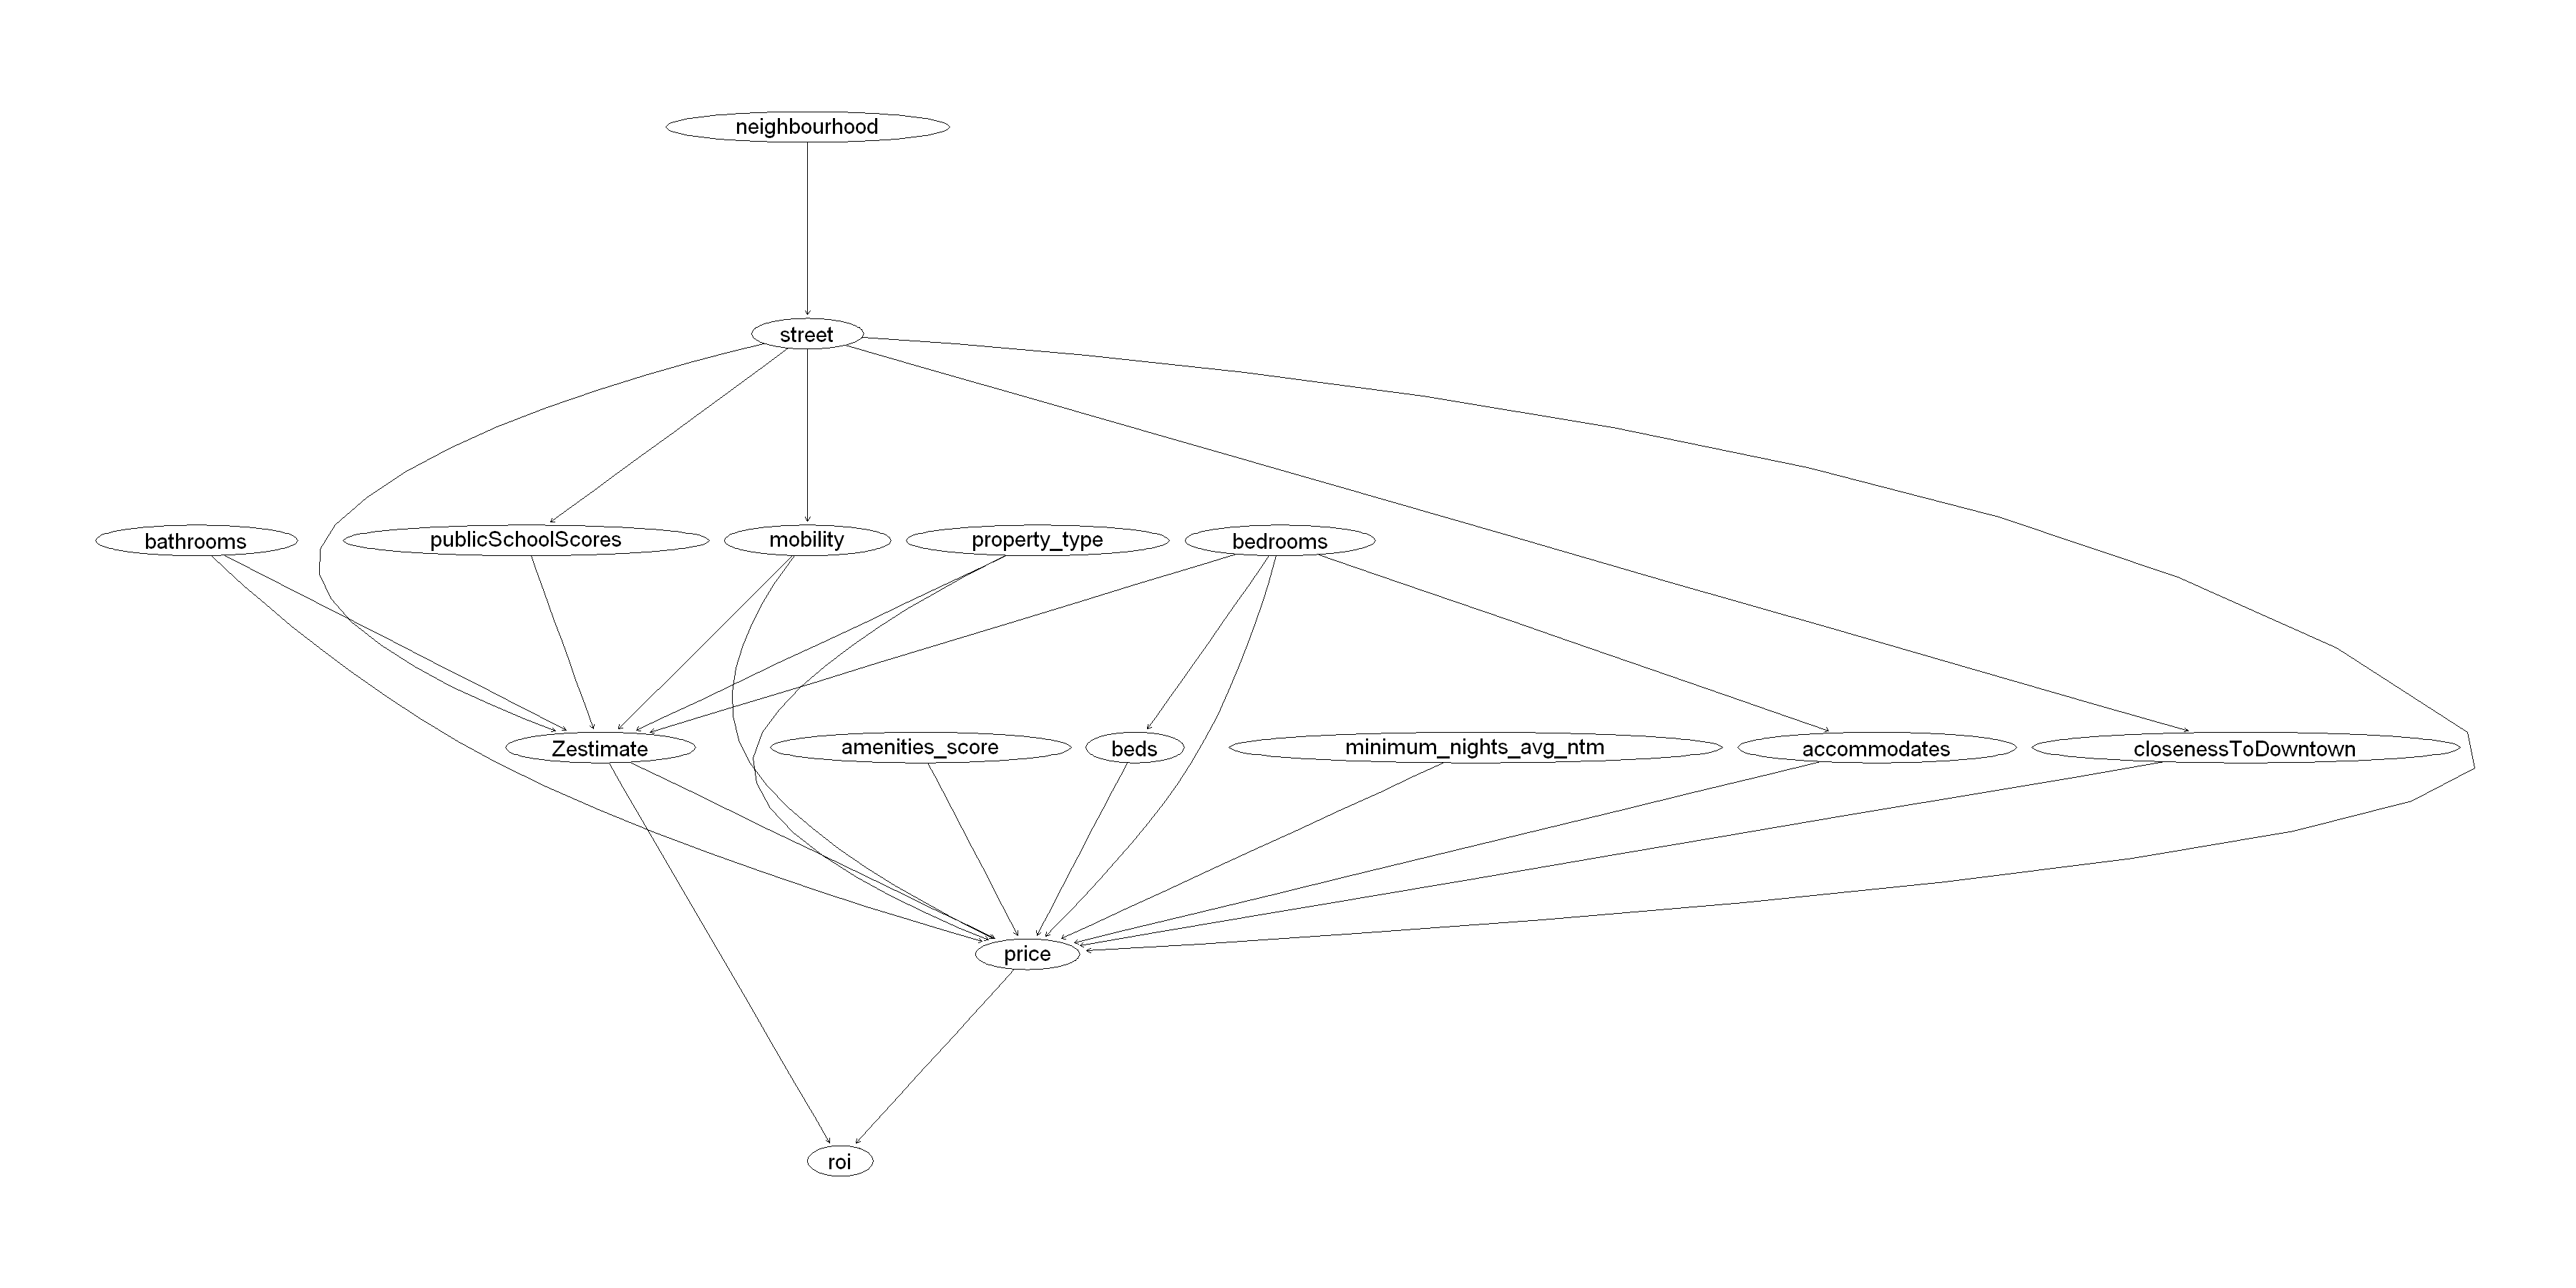

In [27]:
dag2 <- empty.graph(nodes = c('amenities_score','bathrooms','bedrooms','Zestimate',
                              'neighbourhood','roi','price','minimum_nights_avg_ntm',
                              'publicSchoolScores','mobility','property_type',
                              'closenessToDowntown','accommodates','beds', 'street'))

arc.set <- matrix(c('amenities_score','price',
                    'bathrooms','price',
                    'bathrooms','Zestimate',
                    'bedrooms','price',
                    'bedrooms','beds',
                    'bedrooms','accommodates',
                    'bedrooms','Zestimate',
                    'property_type','price',
                    'property_type','Zestimate',
                    'price','roi',
                    'mobility','Zestimate',
                    'Zestimate', 'price',
                    'mobility', 'price',
                    'beds','price',
                    'accommodates','price',
                    'Zestimate','roi',
                    'neighbourhood', 'street',
                    'street', 'price',
                    'street', 'mobility',
                    'street', 'publicSchoolScores',
                    'publicSchoolScores','Zestimate',
                    'street','Zestimate',
                    'street','closenessToDowntown',
                    'closenessToDowntown','price',                    
                    'minimum_nights_avg_ntm','price'),
                  byrow = TRUE, ncol = 2,
                  dimnames = list(NULL, c("from", "to")))
arcs(dag2) <- arc.set

beautifulDAG <- function(nodeList,edgesMat){
  graph <- new("graphNEL", nodes=nodeList, edgemode="directed")
  
  for (i in 1:dim(edgesMat)[1]){
    graph <- addEdge(edgesMat[[i,1]],edgesMat[[i,2]],graph)
  }
  
  nAttrs <- list()
  eAttrs <- list()
  z <- nodeList
  z <- z[1:numNodes(graph)]
  names(z) = nodes(graph)
  nAttrs$label <- z
  
  options(repr.plot.width = 30, repr.plot.height = 15)
  attrs <- list(node=list(shape="ellipse", fixedsize=FALSE))
  attrs$node$fontsize <- 40
  return(plot(graph,nodeAttrs=nAttrs, attrs=attrs))
}

beautifulDAG(nodes(dag2),arcs(dag2))


## Data Filtering
Selecting the required columns that are required by our dag

In [28]:
data2 <- discrete_df %>% select(amenities_score,
                       bathrooms,
                       bedrooms,
                       Zestimate,
                       neighbourhood,
                       roi,
                       price,
                       minimum_nights_avg_ntm,
                       publicSchoolScores,
                       mobility,
                       property_type,
                       closenessToDowntown,
                       accommodates,
                       beds, 
                       street)

data2$bathrooms <- as.factor(data2$bathrooms)
data2$mobility <- as.factor(data2$mobility)
data2$amenities_score <- as.factor(data2$amenities_score)
data2$bedrooms <- as.factor(data2$bedrooms)
data2$Zestimate <- as.factor(data2$Zestimate)
data2$price <- as.factor(data2$price)
data2$property_type <- as.factor(data2$property_type)

factor_names <- names(data2)[which(map_lgl(data2, ~ class(.x) == "factor"))]
factor_names


[1] "amenities_score" "bathrooms"       "bedrooms"        "Zestimate"      
[5] "neighbourhood"   "price"           "mobility"        "property_type"  
[9] "street"

In [29]:
data2_fac <- data2 %>% select(-factor_names) %>% mutate(amenities_score = as.numeric(data2 $ amenities_score),
       bedrooms= as.numeric(data2 $ bedrooms),
       bathrooms = as.numeric(data2 $ bathrooms),
       mobility = as.numeric(data2 $ mobility),
       Zestimate=as.numeric(data2 $ Zestimate),
       roi=as.numeric(data2 $ roi),
       price=as.numeric(data2 $ price),
       minimum_nights_avg_ntm=as.numeric(data2 $ minimum_nights_avg_ntm),
       publicSchoolScores=as.numeric(data2 $ publicSchoolScores),
       closenessToDowntown=as.numeric(data2 $ closenessToDowntown),
       accommodates=as.numeric(data2 $ accommodates),
       property_type=as.numeric(data2 $ property_type),
       beds=as.numeric(data2 $ beds)) 

data2<- data2_fac
data2


roi         minimum_nights_avg_ntm publicSchoolScores closenessToDowntown
1   -19.3669852  29.0                  3.148936            4710              
2     6.0108699   3.0                  4.189189            8963              
3   -14.6407304   2.0                  3.962963            3760              
4   -25.4589576   3.0                  3.640000            2734              
5   -19.1866818   5.0                  4.793103            8382              
6   -29.8131301   2.0                  3.738095            6891              
7   -12.9198011   2.0                  3.142857            4387              
8    -9.9938840  29.0                  3.181818            6815              
9   -11.8489125  29.0                  3.937500           13821              
10  -27.6275751   2.0                  3.916667            3741              
11   42.1184805   2.0                  3.500000            2334              
12    0.9436106   1.0                  2.750000            8437              
13   22.5961905  28.0                  3.136364            1499              
14  -29.0802240   2.1                  3.558824            1981              
15   15.5682368   4.4                  4.216216            3284              
16   29.4739228   3.0                  3.500000            5414              
17  -29.3148326 222.5                  5.173913            9000              
18   -2.9056429  91.0                  3.682927            2996              
19   -6.3110454   1.0                  3.657895            2319              
20   74.7563705   4.4                  3.846154            1922              
21  -19.2920088  31.0                  5.272727            9856              
22   68.9086518   1.0                  4.058824           13511              
23   50.9149169   3.0                  2.909091            8821              
24  -25.1199593  29.0                  3.395349            2976              
25   -9.4272721  28.0                  5.105263           11023              
26  -29.4230412   3.8                  3.629630            2080              
27  -23.8386885  25.6                  3.481481            1476              
28  -22.5940388  29.0                  3.529412            2143              
29   41.6931729   3.0                  3.538462            1995              
30  -23.8386885   1.0                  3.481481            1476              
... ...         ...                    ...                ...                
171  -3.3045046 309.8                  3.269231           3022               
172   4.1889421 339.2                  3.269231           3011               
173  20.3100855  91.0                  3.608696           6612               
174 -21.8874640  28.0                  3.653846           1935               
175  -0.8547408   1.0                  3.608696           5142               
176   8.2435058  28.0                  3.608696           4123               
177 -31.3202045  10.0                  3.392857           1071               
178 -29.7982075  28.0                  3.480000           1821               
179 -28.6279122   2.1                  3.900000           3058               
180 -35.0725734   2.1                  3.974359           2817               
181   8.5673860  29.0                  3.300000           2227               
182  54.2425651   2.1                  3.750000           4482               
183 -12.4695708  29.0                  3.343750           2444               
184 -38.1200523  29.0                  3.354839           2372               
185 -17.5878378  91.0                  3.343750           2297               
186  34.0140351  91.0                  4.000000           3715               
187  12.9194053   2.1                  3.592593           1713               
188 -25.8185053   2.1                  3.640000           1885               
189  -6.6304940   2.1                  3.800000           2101               
190  27.1896608   3.0     

## Step 1: Creating a Model2Network to create the Bayesian Network 

In [30]:
#model2network
net = model2network("[neighbourhood][bathrooms][minimum_nights_avg_ntm][property_type][bedrooms][amenities_score][accommodates|bedrooms][beds|bedrooms][street|neighbourhood][closenessToDowntown|street][publicSchoolScores|street][mobility|street][Zestimate|street:publicSchoolScores:property_type:mobility:bedrooms:bathrooms][price|street:property_type:mobility:minimum_nights_avg_ntm:closenessToDowntown:beds:bedrooms:bathrooms:amenities_score:accommodates:Zestimate]")


[1] "number of arg sets formed: 72254"
[1] "the number of true d-separation: 29084"


## Step 2 : Calculating all the Argument Sets

In [ ]:
vars <- nodes(net)
pairs <- combn(x = vars, 2, list)
arg_sets <- list()
for(pair in pairs){
  others <- setdiff(vars, pair)
  conditioning_sets <- unlist(lapply(0:4, function(.x) combn(others, .x, list)), recursive = F)
  for(set in conditioning_sets){
    args <- list(x = pair[1], y = pair[2], z = set)
    arg_sets <- c(arg_sets, list(args)) 
  }
}

print(paste("number of arg sets formed:",length(arg_sets)))


## Step 3 : Calculating the number of True D-seperations

In [ ]:
d_sep <- bnlearn:::dseparation
True_dsep <- list()
count = 0
for(i in arg_sets){
  truedsep <- d_sep(bn=net, x=i$x, y=i$y, z=i$z)
  if (truedsep == TRUE){
    True_dsep = c(True_dsep, list(i))
    count <- count + 1
  }
}
print(paste('the number of true d-separation:',count))


## Conditional Independence Test(C.I. Test)
The ci.test function in bnlearn does statistical tests for conditional independence. The null hypothesis in this test is that the conditional independence is true. 

So our decision critera is going to be if a p value is below a .05 significance threshold, we conclude that the conditional independence statement is false Otherwise conclude it is true.

In [ ]:
cond_indep <- list()
alpha <- .05
for(i in arg_sets){
  if (i$x != i$y){
    test_outcome <- ci.test(i$x,  i$y , i$z , data2)
  }
  if (test_outcome$p.value > alpha){
    cond_indep <- c(cond_indep, list(i))
  }
}


## Step 5: Global Markov Property

In [ ]:
##True conditional inpdendence statements among true d-separation statements - Global Markov property
ratio <- list()
count <- 0
True_dsep = c(True_dsep, list(args))
for(i in True_dsep){
  test_outcome <- ci.test(i$x,  i$y , i$z , data2)

  alpha <- .05
  #otpt <- d_sep(bn=net, x=args$x, y=args$y, z=args$z)
  
  if (test_outcome$p.value > alpha){
    count <- count+1
    ratio <- c(ratio, test_outcome$p.value > alpha)
  }
}

##proportion of true D-separation statements that are also true conditional independence statements = count/length(True_dsep) = 0.95

## Step 6: Faithfullness Assumption

In [ ]:
##  True d-separation statements among true conditional inpdendence statements - Faithfulness assumption
newratio <- list()
count <- 0
for (i in cond_indep)
{
  res <- d_sep(bn= net, x=i$x, y=i$y, z=i$z)
  if(res == TRUE)
 {
 count <- count + 1
 }
} 

##proportion of true conditional independence statements that are also true-deseparation statements',count/length(cond_indep) = 0.32